### The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?


### Importing necessary libraries

In [132]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import scipy.stats as st
import pylab
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score
from sklearn.model_selection import train_test_split

### loading data set

In [133]:
df=pd.read_csv("D:\python_datascience\data sets\Advertising.csv",index_col=[0])
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


### Viewing Top five rows of data 

In [134]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

### getting shape of data

In [135]:
df.shape

(200, 4)

### Basic information of data 

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


### Data types of features and target variables

In [137]:
df.dtypes


TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

### means the data is in numeric and target is also continuous variable of numeric float type 

### checking missing values 

In [138]:
df.isna().sum() # finding the count of missing values from different columns

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

no missing values in data 

### Check for linearity : showcase the relationship between the features and target column

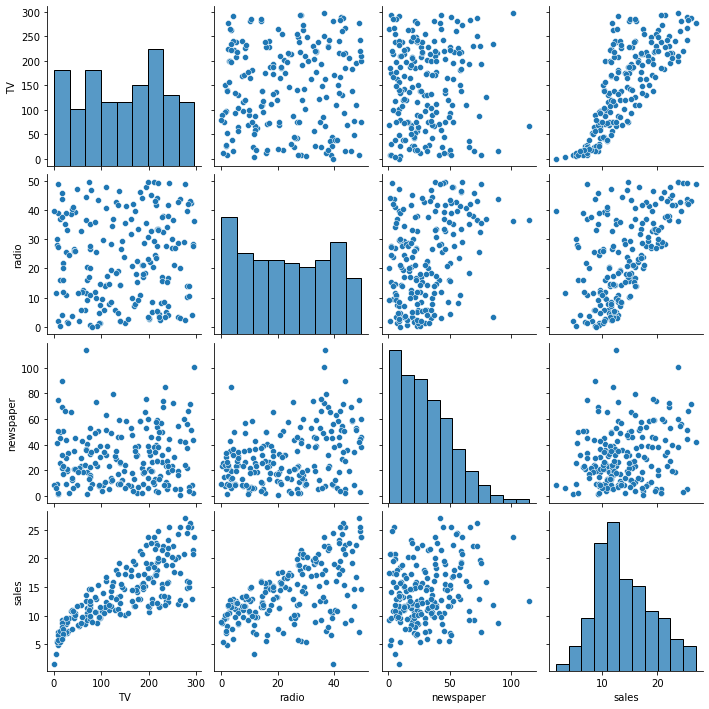

In [139]:
sns.pairplot(df)

or

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

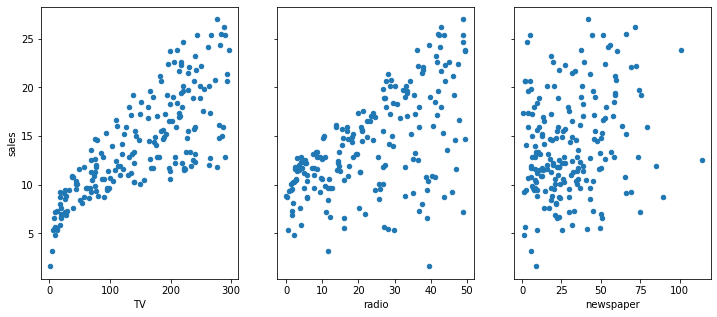

In [140]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(12, 5))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

By looking at the plots we can see that with the Sales variable, the none of the independent variables form an accurately linear shape but TV and Radio do still better than Newspaper which seems to hardly have any specific shape. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

###  See , How data is distributed using distplot()

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

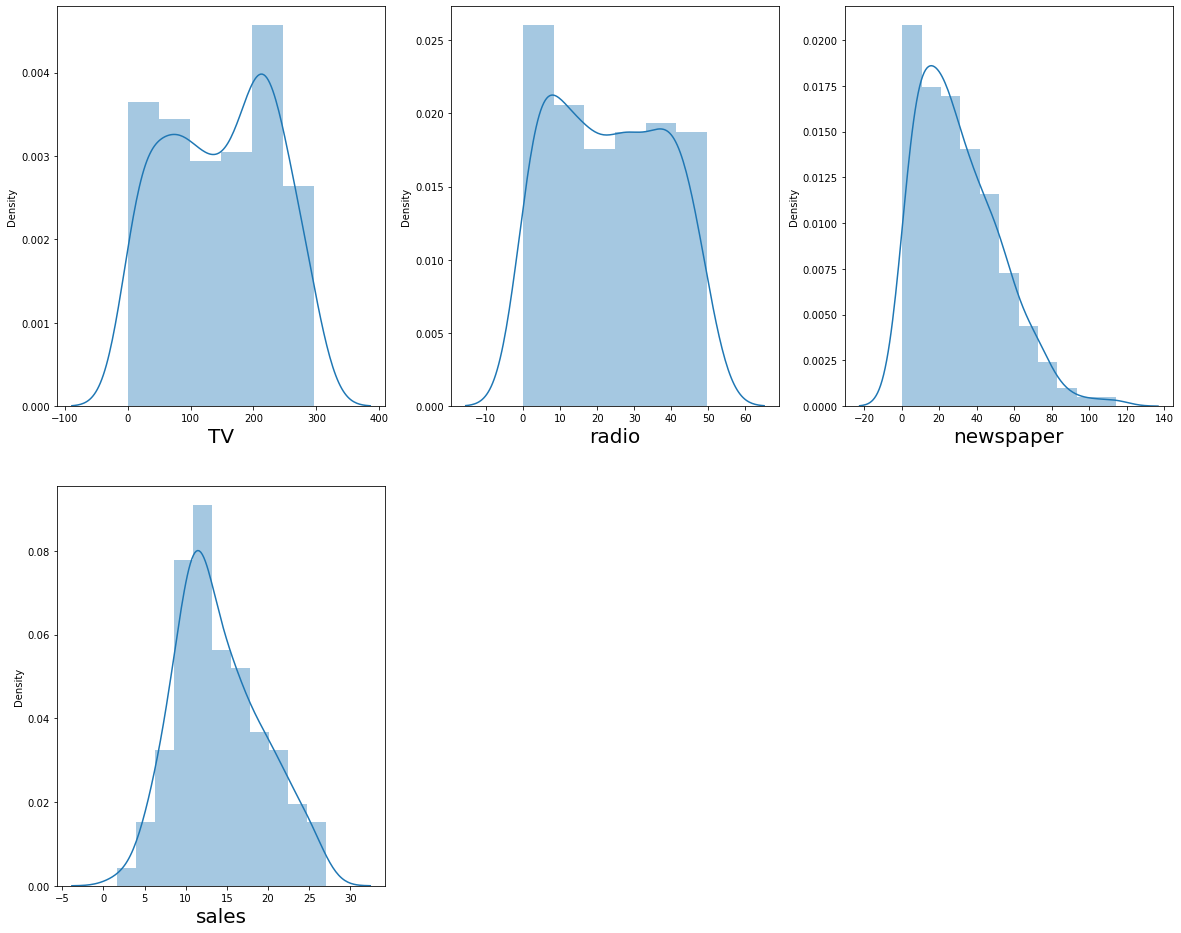

In [141]:

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### check for normality

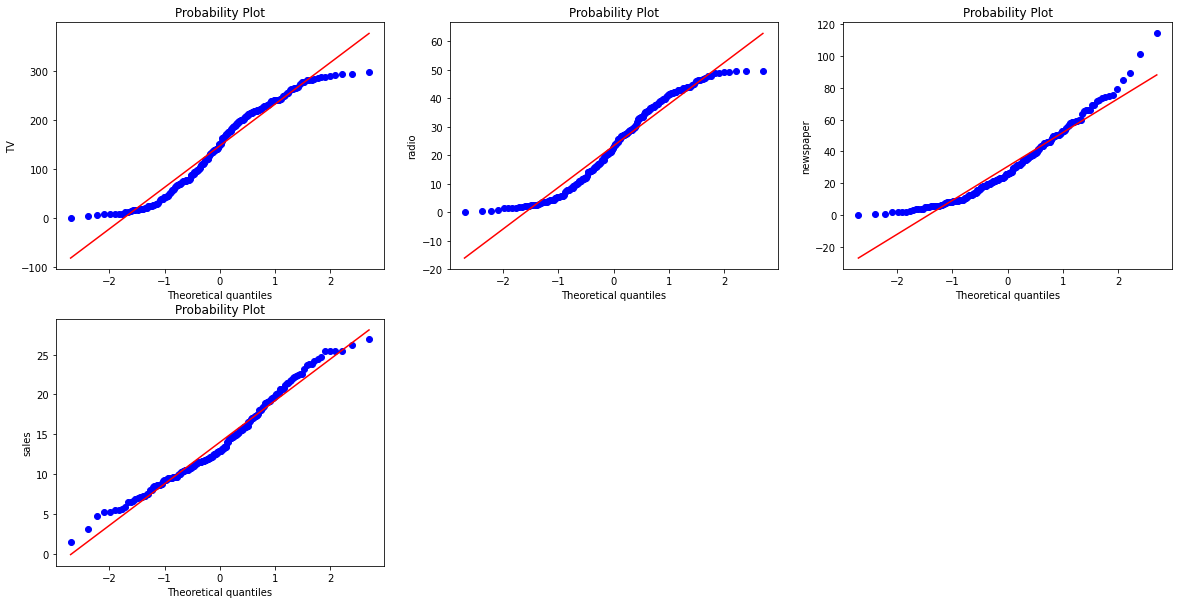

In [142]:
import pylab
col=1
plt.figure(figsize=(20,10))
for i in df.columns:
    if col<5:
        plt.subplot(2,3,col) # rows = 2 columns = 3 col = index
        st.probplot(df[i],dist="norm",plot=pylab)
        plt.ylabel(i)
        col=col+1

### or
### check skewness

In [143]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

### all are not 100% normally distributed either we transform it(using boxcox,log,power) or do scaling of the features 

###  Check Correlation 

<AxesSubplot:>

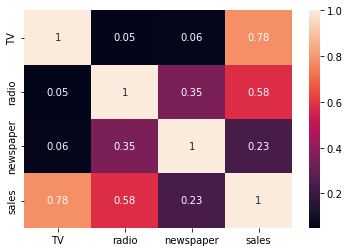

In [144]:
cor_matrix=df.corr().round(2)
sns.heatmap(cor_matrix,annot=True)

### from above we can say that TV is highly correlated with sales i.e 0.78 so we consider one feature as independent variable and sales as target variable for simple linear regression model

In [145]:
x=df.drop(columns=["sales","radio","newspaper"])
x ### one independent feature

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0
199,283.6


In [146]:
y=df["sales"]
y  ## target

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

## do scaling of feature  

In [147]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.96985227],
       [-1.19737623],
       [-1.51615499],
       [ 0.05204968],
       [ 0.3941822 ],
       [-1.61540845],
       [-1.04557682],
       [-0.31343659],
       [-1.61657614],
       [ 0.61604287],
       [-0.94515567],
       [ 0.79002835],
       [-1.4390876 ],
       [-0.57850171],
       [ 0.66625345],
       [ 0.56466461],
       [-0.92530498],
       [ 1.56887609],
       [-0.90895735],
       [ 0.0030068 ],
       [ 0.8332328 ],
       [ 1.05509347],
       [-1.5628625 ],
       [ 0.94883389],
       [-0.98952781],
       [ 1.35285385],
       [-0.04837147],
       [ 1.08662104],
       [ 1.18820988],
       [-0.89260972],
       [ 1.70316018],
       [-0.3986778 ],
       [-0.58200477],
       [ 1.38438142],
       [-0.59952009],
       [ 1.67747105],
       [ 1.39956136],
       [-0.84473452],
       [-1.21372386],
       [ 0.94533082],
       [ 0.64757044],
       [ 0.34981006],
       [ 1.711334  ],
       [ 0.6989487 ],
       [-1.42390765],
       [ 0

### model building  using linear regression model

In [148]:

lm = LinearRegression()
lm.fit(x, y)  ## fitting the best/regression line  at which residulas are minimum



LinearRegression()

### print intercept and coefficients

In [149]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


### Interpreting the model

How do we interpret the coefficient for spends on TV ?
- A "unit" increase in spends on a TV ad is **associated with** a 0.047537 "unit" increase in Sales.
- Or, an additional $1,000  on TV ads is **translated to** an increase in sales by 47.53 Dollars.

As an increase in TV ad expenditure is associated with a **decrease** in sales, $\beta_1$ would be **negative**.


### predictions 

In [150]:
df[df["TV"]==50.0]

,TV,radio,newspaper,sales
171,50.0,11.6,18.4,8.4


In [151]:
sales_prediction = 7.032593549127693+0.04753664*50.0
sales_prediction

9.409425549127693

actual sales was 8.4 model predicted 9.4

or prediction using code 

In [152]:
sales_pred=lm.predict([[50.0]])
sales_pred

C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

### predictions of sales of first 30 TV values using model

In [153]:
Y_pred=lm.predict(df[["TV"]])[0:30]
Y_pred

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036])

In [154]:
y_actual=df["sales"][0:30]
y_actual


1     22.1
2     10.4
3      9.3
4     18.5
5     12.9
6      7.2
7     11.8
8     13.2
9      4.8
10    10.6
11     8.6
12    17.4
13     9.2
14     9.7
15    19.0
16    22.4
17    12.5
18    24.4
19    11.3
20    14.6
21    18.0
22    12.5
23     5.6
24    15.5
25     9.7
26    12.0
27    15.0
28    15.9
29    18.9
30    10.5
Name: sales, dtype: float64

In [155]:
ya=y_actual.reset_index()  # as its indexing starts from 0
ya

,index,sales
0,1,22.1
1,2,10.4
2,3,9.3
3,4,18.5
4,5,12.9
5,6,7.2
6,7,11.8
7,8,13.2
8,9,4.8
9,10,10.6


In [156]:
ya=y_actual.reset_index()  # as its indexing starts from 0
ya

,index,sales
0,1,22.1
1,2,10.4
2,3,9.3
3,4,18.5
4,5,12.9
5,6,7.2
6,7,11.8
7,8,13.2
8,9,4.8
9,10,10.6


In [157]:
ya.drop(columns=["index"],inplace=True)
ya


,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [158]:
t=df["TV"][0:30].reset_index()
t

,index,TV
0,1,230.1
1,2,44.5
2,3,17.2
3,4,151.5
4,5,180.8
5,6,8.7
6,7,57.5
7,8,120.2
8,9,8.6
9,10,199.8


In [159]:
t.drop(columns=["index"],inplace=True)
t

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
5,8.7
6,57.5
7,120.2
8,8.6
9,199.8


In [160]:
final_df=pd.DataFrame({"TV":t["TV"][0:30],"actual_sales":ya["sales"],"predicted_sales":Y_pred})
final_df

,TV,actual_sales,predicted_sales
0,230.1,22.1,17.970775
1,44.5,10.4,9.147974
2,17.2,9.3,7.850224
3,151.5,18.5,14.234395
4,180.8,12.9,15.627218
5,8.7,7.2,7.446162
6,57.5,11.8,9.765950
7,120.2,13.2,12.746498
8,8.6,4.8,7.441409
9,199.8,10.6,16.530414


### plot regression line 

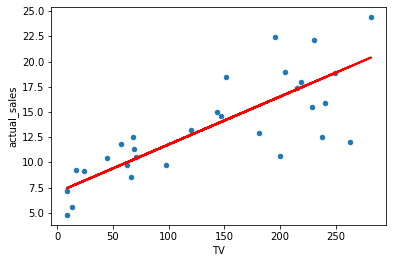

In [161]:
# first, plot the observed data
final_df.plot(kind='scatter', x='TV', y='actual_sales')
# then, plot the least squares line
plt.plot(final_df["TV"],final_df["predicted_sales"], c='red', linewidth=2)

### RSS :  Residual Sum of squares

#### Compute RSS  manually

In [162]:
## calculating Residuals
final_df["residual"]=final_df["actual_sales"]-final_df["predicted_sales"]
final_df

,TV,actual_sales,predicted_sales,residual
0,230.1,22.1,17.970775,4.129225
1,44.5,10.4,9.147974,1.252026
2,17.2,9.3,7.850224,1.449776
3,151.5,18.5,14.234395,4.265605
4,180.8,12.9,15.627218,-2.727218
5,8.7,7.2,7.446162,-0.246162
6,57.5,11.8,9.765950,2.034050
7,120.2,13.2,12.746498,0.453502
8,8.6,4.8,7.441409,-2.641409
9,199.8,10.6,16.530414,-5.930414


In [163]:
## Residua; squares
final_df["residual square"]=final_df["residual"]**2
final_df

,TV,actual_sales,predicted_sales,residual,residual square
0,230.1,22.1,17.970775,4.129225,17.050503
1,44.5,10.4,9.147974,1.252026,1.567569
2,17.2,9.3,7.850224,1.449776,2.101851
3,151.5,18.5,14.234395,4.265605,18.195390
4,180.8,12.9,15.627218,-2.727218,7.437719
5,8.7,7.2,7.446162,-0.246162,0.060596
6,57.5,11.8,9.765950,2.034050,4.137358
7,120.2,13.2,12.746498,0.453502,0.205664
8,8.6,4.8,7.441409,-2.641409,6.977040
9,199.8,10.6,16.530414,-5.930414,35.169814


### RSS : Residual squarred sum

In [164]:
rss= final_df["residual square"].sum()
rss

273.4594346488183

### COMPUTE TSS

In [165]:
sales_mean=final_df["actual_sales"].mean()
tss=0
for sale in final_df["actual_sales"]:
    tss=tss+(sale-(sales_mean))**2
print(tss)

711.2549999999999


### Compute R score 

In [166]:
1-(rss/tss)

0.6155254660440794

### model evaluation using mse,mae,r score 

#### mse

In [167]:
me_err=mse(final_df["actual_sales"],final_df["predicted_sales"])
me_err

9.115314488293942

#### mae

In [168]:
mean_absolute_error=mae(final_df["actual_sales"],final_df["predicted_sales"])
mean_absolute_error

2.284524110254865

#### Model accuracy 

#### How Well Does the Model Fit the data?

One of the most generic way to evaluate the fit of a linear model is by computing the **R-squared** value. R-squared explains the**proportion of variance**, i.e., the proportion of variance in the observed data which the model explains, or the reduction in error over the **null model**. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)

The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model. 

In [169]:
r2_score(final_df["actual_sales"],final_df["predicted_sales"])

0.6155254660440794

### Predictions on Random test data on same model  : 

In [170]:
#  Let's create a DataFrame since the model expects it
x_test = pd.DataFrame({'TV': np.random.randint(0.7,299,200)})
x_test

,TV
0,75
1,50
2,234
3,126
4,6
...,...
195,110
196,239
197,120
198,270


### getting shape of test data 

In [171]:
x_test.shape

(200, 1)

### predictions on test data 

In [172]:
# use the model to make predictions on a new value
y_pred = lm.predict(x_test)
y_pred

array([10.59784158,  9.40942557, 18.15616741, 13.02221024,  7.31781339,
        8.93405917, 18.53646053, 12.11901408, 12.16655072, 11.12074463,
       19.72487654,  9.36188893, 10.45523166, 11.73872095, 17.53819108,
        7.93578972, 10.64537822, 18.34631397, 16.53992164, 16.92021476,
       11.54857439, 14.7335293 , 13.21235681, 13.73525985, 20.72314599,
       14.7335293 , 18.86921702,  8.88652253,  9.50449885, 13.87786977,
       15.58918883,  8.64883932,  7.50795995, 11.12074463, 16.7300682 ,
       20.10516967,  9.45696221,  7.60303323, 18.29877733,  8.22100956,
       13.35496673, 13.40250337, 10.69291486, 11.12074463, 17.39558116,
       20.67560935, 11.12074463, 11.88133087, 10.97813471, 10.78798814,
       17.58572773, 20.81821927,  9.50449885,  9.07666909, 11.45350111,
       14.82860258,  9.88479198, 14.63845602, 14.63845602, 11.12074463,
       11.45350111, 20.29531623,  9.45696221, 13.54511329,  9.64710877,
        8.79144925,  8.88652253,  7.22274011, 19.05936358, 16.68

### Evaluation of model 

In [173]:
me_err = mse(df["sales"],y_pred)
me_err

47.91385632733655

error is too high so we optimize the model using optimizing technique : gradient descent method

## gradient descent :

Since  the sum of the square of residuals is:

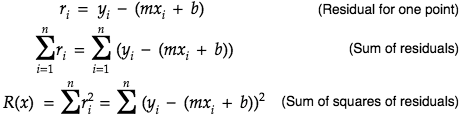

As we can see that the residual is both a function of m and b, so differentiating partially with respect to m and b will give us:




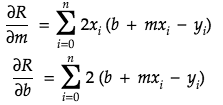

For getting the best fit line, residual should be minimum. The minima of a function occurs where the derivative=0. So, equating our corresponding derivatives to 0, we get:

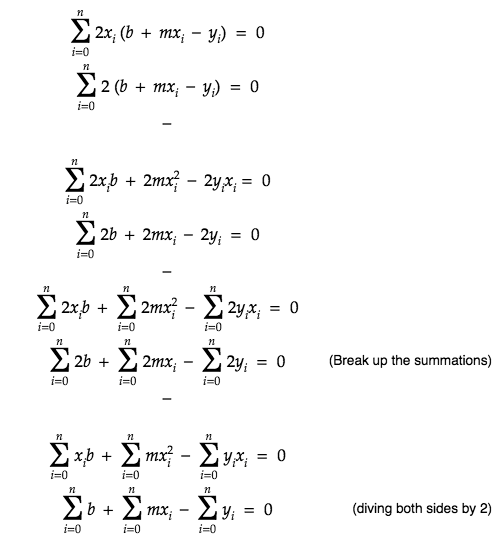

In [174]:
c = lm.intercept_
m = lm.coef_
print(m,c)
X_new = df.iloc[:,0]
y = df.iloc[:,3] # or df["sales"]
L = 0.0001  # The learning Rate
epochs = 100 # The number of iterations to perform gradient descent

n = float(len(X_new)) # Number of elements in X
#print(type(X))
# Performing Gradient Descent 
for i in range(epochs): 
    y_pred = m*X_new + c  # The current predicted value of Y
    D_m = (-2/n)*sum(X_new*(y - y_pred))  # Derivative wrt m
    D_c = (-2/n)*sum(y-y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
    print (m, c)
print(y_pred)

[0.04753664] 7.032593549127693
[0.04753664] 7.032593549127693
[0.04753664] 7.032593549127693
[0.04753664] 7.032593549127693
[0.04753664] 7.032593549127693
[0.04753664] 7.032593549127693
[0.04753664] 7.032593549127694
[0.04753664] 7.032593549127689
[0.04753664] 7.032593549127712
[0.04753664] 7.032593549127606
[0.04753664] 7.032593549128114
[0.04753664] 7.032593549125678
[0.04753664] 7.032593549137349
[0.04753663] 7.032593549081427
[0.04753668] 7.032593549349367
[0.04753643] 7.032593548065595
[0.04753764] 7.032593554216491
[0.04753184] 7.0325935247459
[0.04755964] 7.03259366594739
[0.04742642] 7.032592989413249
[0.04806472] 7.032596230869446
[0.04500645] 7.032580700184958
[0.05965946] 7.032655111852428
[-0.01054703] 7.0322985856310645
[0.32583105] 7.034006798211727
[-1.28584639] 7.025822294391583
[6.43613173] 7.065036443461933
[-30.56193286] 6.877150956314023
[146.70570019] 7.77736062852896
[-702.63099026] 3.4642150724202665
[3366.76848979] 24.12965020644581
[-16130.81393477] -74.8839823

In [175]:
## Prediction using one of the updated m and c for corresponding tv =50.0 
y_1 = 0.03*50+7.03
y_1

8.530000000000001

In [176]:
mean_sq_err = mse(df["sales"],y_pred)
mean_sq_err

2.620171812800787e+105

##### Now error has been optimized 

### Multiple_linear_Regression_Model

#### Assumptions for Linear Regression

1. LINEARITY :


Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable

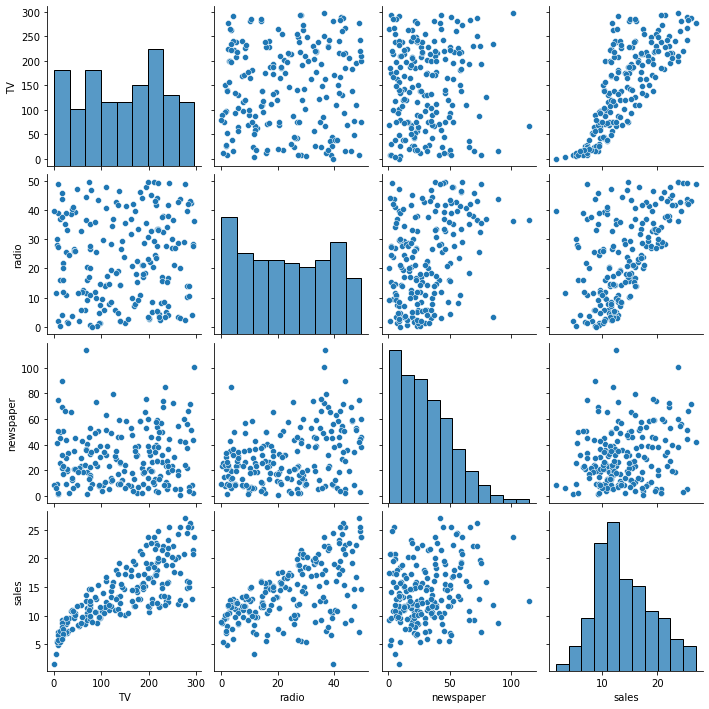

In [177]:
sns.pairplot(df)

By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately linear shape but TV and Radio do still better than Newspaper which seems to hardly have any specific shape. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc

Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.

### Model fitting first 

####  create x and y on same data set 

In [178]:
x=df.drop(columns="sales")
x   ### features 

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [179]:
y=df["sales"]
y ## target

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

#### Do features scaling 

In [180]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

### Dividing the data set into training and test data 

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,random_state = 0,test_size=0.25)

### Getting shape of training and test data 

In [182]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


### Model Building 

In [183]:

lm = LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

In [184]:
print(lm.intercept_)
print(lm.coef_)

14.051457996097845
[3.78203385 2.94717399 0.02525815]


In [185]:
y_pred = lm.predict(x_test)
y_pred

array([10.0494569 ,  7.43052335,  6.97152143, 24.16378667, 12.00215643,
        6.54334645, 13.09526331, 14.95879164, 11.00528358, 16.27234553,
       22.99324688,  9.12188347, 10.33545333, 15.39628185, 11.60589932,
       12.11484332, 18.60251172, 10.81414474, 16.07541355, 17.22753644,
       24.2342995 ,  9.47711838, 15.13960412, 12.41064749,  5.67814427,
       15.22889947, 12.21635459, 20.94370559, 13.28068231,  9.16578351,
       13.30285718, 21.5770033 , 18.098111  , 21.15572322,  6.69734039,
        6.15355714,  7.96280151, 13.09426248, 14.81032968,  6.22020075,
       12.2799744 ,  9.1817324 , 15.04882696, 16.26091437, 17.16859664,
       13.32831849,  3.69143664, 12.43931798, 15.87909695,  8.68626862])

In [186]:
dff=pd.DataFrame(x_test,columns=["TV","radio","newspaper"])
dff

,TV,radio,newspaper
0,-0.908957,-0.186635,-0.564074
1,-1.133153,-0.787595,-0.559471
2,-0.661408,-1.550611,-0.338518
3,1.665794,1.285378,0.950373
4,0.270407,-1.044184,0.213864
5,-1.060757,-1.185984,-0.039311
6,-1.615408,1.731034,2.045930
7,1.086621,-1.077946,-1.005979
8,-1.439088,0.799209,1.627040
9,0.590354,0.002431,-0.752804


In [187]:
dff["y_test"]=y_test
dff

,TV,radio,newspaper,y_test
0,-0.908957,-0.186635,-0.564074,NaN
1,-1.133153,-0.787595,-0.559471,NaN
2,-0.661408,-1.550611,-0.338518,NaN
3,1.665794,1.285378,0.950373,NaN
4,0.270407,-1.044184,0.213864,NaN
5,-1.060757,-1.185984,-0.039311,12.9
6,-1.615408,1.731034,2.045930,7.2
7,1.086621,-1.077946,-1.005979,NaN
8,-1.439088,0.799209,1.627040,13.2
9,0.590354,0.002431,-0.752804,4.8


In [188]:
ya=y_test.reset_index()
ya

,index,sales
0,19,11.3
1,171,8.4
2,108,8.7
3,99,25.4
4,178,11.7
5,183,8.7
6,6,7.2
7,147,13.2
8,13,9.2
9,153,16.6


In [189]:
ya.drop(columns="index",inplace=True)
ya

,sales
0,11.3
1,8.4
2,8.7
3,25.4
4,11.7
5,8.7
6,7.2
7,13.2
8,9.2
9,16.6


In [190]:
dff["y_test"]=ya["sales"]
dff

,TV,radio,newspaper,y_test
0,-0.908957,-0.186635,-0.564074,11.3
1,-1.133153,-0.787595,-0.559471,8.4
2,-0.661408,-1.550611,-0.338518,8.7
3,1.665794,1.285378,0.950373,25.4
4,0.270407,-1.044184,0.213864,11.7
5,-1.060757,-1.185984,-0.039311,8.7
6,-1.615408,1.731034,2.045930,7.2
7,1.086621,-1.077946,-1.005979,13.2
8,-1.439088,0.799209,1.627040,9.2
9,0.590354,0.002431,-0.752804,16.6


In [191]:
dff["y_pred"]=y_pred
dff

,TV,radio,newspaper,y_test,y_pred
0,-0.908957,-0.186635,-0.564074,11.3,10.049457
1,-1.133153,-0.787595,-0.559471,8.4,7.430523
2,-0.661408,-1.550611,-0.338518,8.7,6.971521
3,1.665794,1.285378,0.950373,25.4,24.163787
4,0.270407,-1.044184,0.213864,11.7,12.002156
5,-1.060757,-1.185984,-0.039311,8.7,6.543346
6,-1.615408,1.731034,2.045930,7.2,13.095263
7,1.086621,-1.077946,-1.005979,13.2,14.958792
8,-1.439088,0.799209,1.627040,9.2,11.005284
9,0.590354,0.002431,-0.752804,16.6,16.272346


### model evaluation 

In [192]:
## mse
mean_sq_err = mse(dff["y_test"],dff["y_pred"])
mean_sq_err

4.012497522917104

In [193]:
## r square
r2_score(dff["y_test"],dff["y_pred"])

0.8576396745320891

####  85% model accuracy

### check assumptions contd:


#### 2. Mean of residuals:


Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [194]:
y_pred = lm.predict(x_train)
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -6.158037043254202e-16


Very close to zero so all good here.

#### 3. Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

Detecting heteroscedasticity!
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


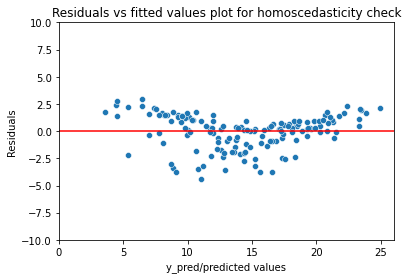

In [195]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

#### 4. check for normality of error terms


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


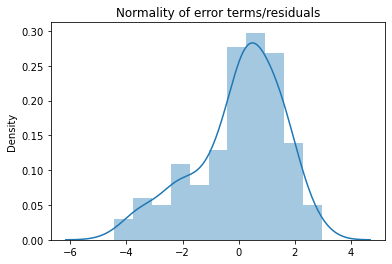

In [196]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

### 5. No autocorrelation of residuals
When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.
In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.
There should not be autocorrelation in the data so the error terms should not form any pattern.¶

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


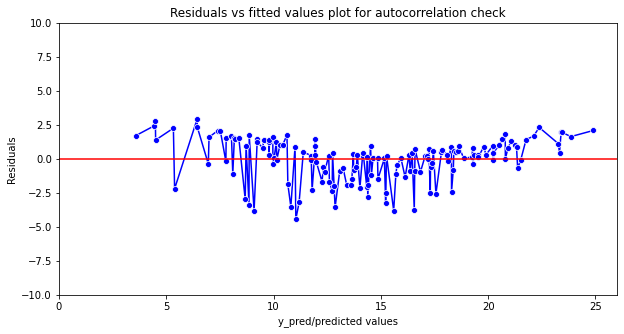

In [197]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

### 5. No multicollinearity  

multicollinearity refers to the extent to which independent variables are correlated.

In [198]:
x_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [199]:
vif = pd.DataFrame()  ##creating blank dataframe 
#vif
variables  = x_scaled
#variables.shape
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
#vif["VIF"]
vif["features"]=x.columns
#vif["features"]
vif

,VIF,features
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


### the vif of all features are less than 5 so we no multicoolinearity exist in the data set

### Handling Categorical Predictors with Two Categories

Till now, all the predictors have been numeric. What if one of the predictors is categorical?

We’ll create a new feature called **Scale**, and shall randomly assign observations as **small or large**:


In [200]:
import numpy as np

# set a seed for reproducibility
#np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(df))
print(nums)
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
df['Scale'] = 'small'
df.loc[mask_large, 'Scale'] = 'large'
df.head()

[0.5227579  0.31191031 0.65654234 0.25864729 0.65509558 0.65492005
 0.45259419 0.4543075  0.91826018 0.58155581 0.47040952 0.41743353
 0.5520209  0.48312494 0.80704639 0.27794997 0.21349962 0.47152431
 0.50145848 0.14170777 0.76361661 0.08163877 0.90628375 0.48010085
 0.47225023 0.38006077 0.82214936 0.45915079 0.85119594 0.12579054
 0.85781629 0.79547232 0.52772842 0.56116367 0.94532369 0.62224942
 0.51128333 0.57767484 0.98913808 0.52805022 0.62774969 0.65232562
 0.39328856 0.10362725 0.05678625 0.74925519 0.50553282 0.88367286
 0.6540099  0.99611754 0.69173612 0.98634863 0.02372859 0.45885158
 0.28463169 0.00423632 0.44234741 0.76702032 0.8905919  0.56874741
 0.33269162 0.85886447 0.57107271 0.34740868 0.84386382 0.90239406
 0.53841817 0.4282772  0.87085885 0.38082694 0.32181928 0.55919759
 0.38256718 0.11904121 0.71594973 0.44815624 0.60650569 0.30072567
 0.66641788 0.84772402 0.07575708 0.31584472 0.26394051 0.95738519
 0.35204696 0.45680161 0.17840603 0.40034842 0.49550323 0.8157

,TV,radio,newspaper,sales,Scale
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,large
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For the scikit-learn library, all data must be represented numerically. If the feature only has two categories, we can simply create a dummy variable that represents the categories as a combination of binary value:

In [201]:
# create a new Series called IsLarge
df['IsLarge'] = df.Scale.map({'small':0, 'large':1})
df.head()

,TV,radio,newspaper,sales,Scale,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,large,1
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression problem and include the **IsLarge** predictor:

In [202]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = df[feature_cols]
y = df.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
i=0
for col in feature_cols:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i])
    print('the intercept of ',col,lm.intercept_)
    i=i+1

The Coefficient of  TV  is:  0.045774640390921606
the intercept of  TV 3.006379284235356
The Coefficient of  radio  is:  0.18837559605951607
the intercept of  radio 3.006379284235356
The Coefficient of  newspaper  is:  -0.0011885044387596336
the intercept of  newspaper 3.006379284235356
The Coefficient of  IsLarge  is:  -0.10565764525941798
the intercept of  IsLarge 3.006379284235356


### Handling Categorical variables with More than Two Categories

Let's create a new column called **Targeted Geography**, and randomly assign observations to be **rural, suburban, or urban**:


In [203]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(df))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
df['Targeted Geography'] = 'rural'
df.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
df.loc[mask_urban, 'Targeted Geography'] = 'urban'
df.head()

,TV,radio,newspaper,sales,Scale,IsLarge,Targeted Geography
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,large,1,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We need to represent the ‘Targeted Geography’ column numerically. But mapping urban=0, suburban=1 and rural=2 will mean that rural is two times suburban which is not the case.
Hence, we’ll create another **dummy variable**:


In [204]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(df['Targeted Geography'], prefix='Targeted Geography').iloc[:,1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
df = pd.concat([df, area_dummies], axis=1)
df.head()

,TV,radio,newspaper,sales,Scale,IsLarge,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,large,1,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


What does the encoding say?
* rural is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=0
* suburban is encoded as Targeted Geography_suburban=1 and Targeted Geography_urban=0
* urban is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=1

Now the question is: **Why have we used two dummy columns instead of three?**

Because using only two dummy columns, we can capture the information of all the 3 columns. For example, if the value for Targeted Geography_urban as well as Targeted Geography_rural is 0, it automatically means that the data belongs to Targeted Geography_suburban.

This is called handling the **dummy variable trap**. If there are N dummy variable columns, then the same information can be conveyed by N-1 columns.
Let's include the two new dummy variables in the model:


In [205]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban']
X = df[feature_cols]
y = df.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(feature_cols, lm.coef_)

['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban'] [ 0.04580874  0.18751871 -0.00113697 -0.08077323 -0.11888513  0.2453921 ]




**A final note about dummy encoding:** If we have categories that can be ranked (i.e., worst, bad, good, better, best), we can potentially represent them numerically  as (1, 2, 3, 4, 5) using a single dummy column
